<a href="https://colab.research.google.com/github/Ape12b/TensorFlow/blob/main/01_neural_newtwork_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # This notebook serves as an introduction to regression using Neural Networks in Tensorflow

 Regression in this example means predicting a numrical value (dependent variable) (imp) based on the combination of some other variables (independent variable) (features, attributes etc.)

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.11.0


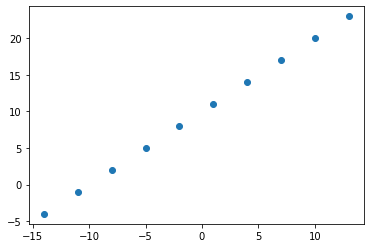

In [ ]:
# Create features
X = np.array([i for i in range(-14, 14, 3)])

# Create labels
y = X + 10

# Visualize the relationship
plt.scatter(X, y)

## Input and output shapes

In [ ]:
# Create a demo tensor for housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939000], dtype=int32)>)

In [ ]:
# Turn numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([-14., -11.,  -8.,  -5.,  -2.,   1.,   4.,   7.,  10.,  13.],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([-4., -1.,  2.,  5.,  8., 11., 14., 17., 20., 23.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model:**
* Defining the input layer (num neurons = num features = 1)
* Defining the hidden layers and their activation (num neurons = variable, activation =  ReLu [rectified linear unit])
* Defining the output layer (num nuerons = num output = 1)
(model.keras.Sequential)

2. **Compiling the model:** 
* Specify the loss function: Minimum Absolute error (tells you how wrong the model is)
* Specify the optimizer to be used: SGD (Stochastic Gradient Descent) or Adam (how we improve the model)
* Specify the evaluation metrics: How do we interpret the performance of our model.
(model.compile)

3. **Fitting a model** - Letting a model find the relationship between features and outputs. (model.fit)

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # Stochastic Gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 5)


Epoch 1/5
1/1 [==============================] - 0s 362ms/step - loss: 11.4126 - mae: 11.4126
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2065 - mae: 11.2065
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 11.0004 - mae: 11.0004
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 10.7943 - mae: 10.7943
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.5882 - mae: 10.5882


1/1 [==============================] - 0s 77ms/step


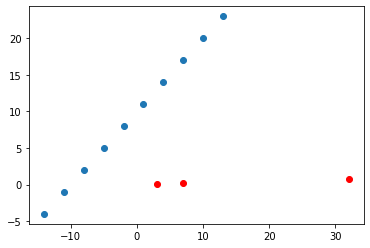

In [ ]:
# 4. Make Prediction
plt.scatter(X,y)
plt.scatter([32, 3, 7], model.predict([32, 3, 7]), color="red")
plt.show()

## Improving the model

We can improve out model by altering the steps we took to create a model.

1. **Creating a model** - We can add more layers, improve the number of neurons in the layers, change the activation of each layer.
2. **Compiling a model** - Change the optimization function, or the learning rate of the optimization function.
3. **Fitting a model** - increase the number of epoche or increase the amount of data. 

In [ ]:
# Let's rebuild the model, training it longer

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["accuracy"])

# 3. Fit the model - We'll train it longer
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 695ms/step - loss: 20.3598 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 19.8553 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 19.3508 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 18.8463 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 18.3418 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 17.8373 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 17.3328 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 16.8283 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 16.3238 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 

[8.8910551071167, 0.0]

1/1 [==============================] - 0s 50ms/step


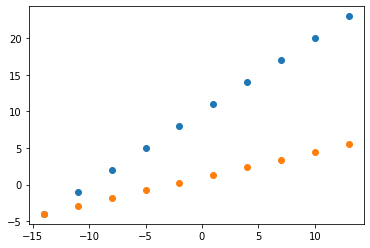

In [ ]:
plt.scatter(tf.expand_dims(X, axis=-1), tf.expand_dims(y, axis=-1))
plt.scatter(X, model.predict(X))

In [ ]:
print(X - y)
model.predict([4])

tf.Tensor([-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.], shape=(10,), dtype=float32)
1/1 [==============================] - 0s 68ms/step


array([[2.369627]], dtype=float32)

In [ ]:
# Improve model creation
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation= "relu"))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mse,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mse"])

# Fit the model
model.fit(tf.expand_dims(X, axis = -1),y, epochs = 100)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 157.9087 - mse: 157.9087
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 140.6608 - mse: 140.6608
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 126.1255 - mse: 126.1255
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 112.7087 - mse: 112.7087
Epoch 5/100
1/1 [==============================] - 0s 28ms/step - loss: 99.9310 - mse: 99.9310
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 87.8156 - mse: 87.8156
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 76.5532 - mse: 76.5532
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 66.3054 - mse: 66.3054
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 56.8312 - mse: 56.8312
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 48.1660 - mse: 48.1660
Epoch 11/100
1/1 [=========================

1/1 [==============================] - 0s 81ms/step


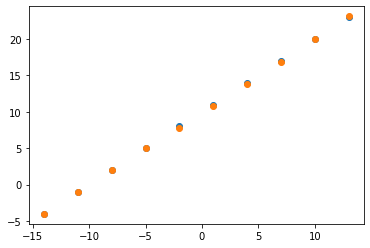

In [ ]:
plt.scatter(tf.expand_dims(X, axis=-1), tf.expand_dims(y, axis=-1))
plt.scatter(X, model.predict(X))

## Evaluating the model

In practice we train it -> [Fit it -> Evaluate it - > tweak it ->] (repeat till satisfied) 

When evaluating models, visualize it!!
In general its a good idea to visualize:
* The data
* The model 
* Training of the model
* Predictions of the model


In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

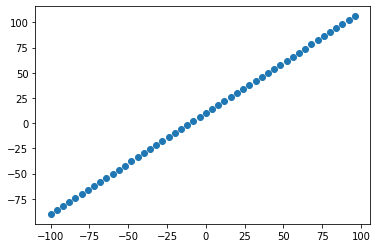

In [ ]:
plt.scatter(X,y)

### The three sets
* **Training set:** Data that the model learns from (70-80 %)
* **Validation set**: Model gets tuned on this data (10-15 %)
* **Test set:** Model gets evaluated on this data (10-15 %)

In [ ]:
# Check the length of samples
len(X)

50

#### Split the data into train and test set

In [ ]:
# Split the data into train and test set
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

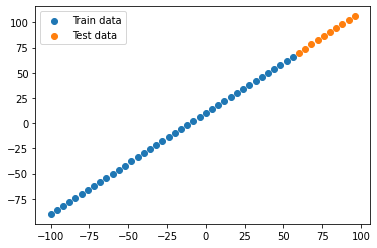

In [ ]:
plt.scatter(X_train, y_train, label="Train data")
plt.scatter(X_test, y_test, label="Test data")
plt.legend()

In [ ]:
# Building a neural network for our data

# Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation = "relu"))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss="MAE",
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 2s 10ms/step - loss: 30.3156 - mae: 30.3156
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 20.0128 - mae: 20.0128
Epoch 3/100
2/2 [==============================] - 0s 20ms/step - loss: 11.0690 - mae: 11.0690
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 10.4538 - mae: 10.4538
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4473 - mae: 9.4473
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 8.0956 - mae: 8.0956
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 5.5440 - mae: 5.5440
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 6.9928 - mae: 6.9928
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 7.1143 - mae: 7.1143
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 6.0339 - mae: 6.0339
Epoch 11/100
2/2 [==============================] - 0s 11ms/step -

In [ ]:
# Prediction
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 218ms/step


In [ ]:
# Visualizing the model
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 100)               200       
                                                                 
 dense_66 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


* **Total params:** total params in our model
* **Trainable params:** params that model updates while training
* **Non-trainable params:** params not updates during training (params that are transfered from other models during **transfer learning**)

In [ ]:
x = tf.constant([[1,3,4],
                 [1,4,5]])
x.shape

TensorShape([2, 3])

In [ ]:
def summary_model(model):
  from tensorflow.keras.utils import plot_model
  model.summary()
  plot_model(model, show_shapes=True)

In [ ]:
# Creating a model that builds automatically by defining the input_shape
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, input_shape = [1], activation = "relu"))
model.add(tf.keras.layers.Dense(100, activation = "relu"))
model.add(tf.keras.layers.Dense(1))
# Complile the model
model.compile(loss="MSE",
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mse"])


In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs = 100, verbose = 0)

###  Visualizing a models predictions

It's a good idea to plot the predictions against ground truth labels. 

So, a graph of the form y_test vs y_true



1/1 [==============================] - 0s 59ms/step


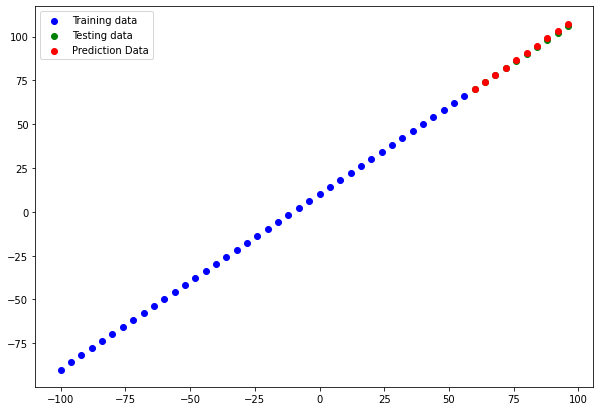

In [ ]:
# Visualizing
y_pred = model.predict(X_test)
plot_func(train_data = X_train,
              train_label = y_train,
              test_data = X_test,
              test_label = y_test,
              pred_data = y_pred)

In [ ]:
# Creating aplottng function
def plot_func(train_data = X_train,
              train_label = y_train,
              test_data = X_test,
              test_label = y_test,
              pred_data = y_pred):
  """
  Plot's, training data, test data and compares predictions to ground truth
  train_data: Training attributes,
  train_label: Outputs of training data,
  test_data = Testing attributes,
  test_label = Outputs of testing data,
  pred_data = Predicted values
  
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_label, c = 'b', label = "Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_label, c = 'g', label = "Testing data")
  # Plot predictions in red
  plt.scatter(test_data, pred_data, c = 'r', label = "Prediction data")
  plt.legend()



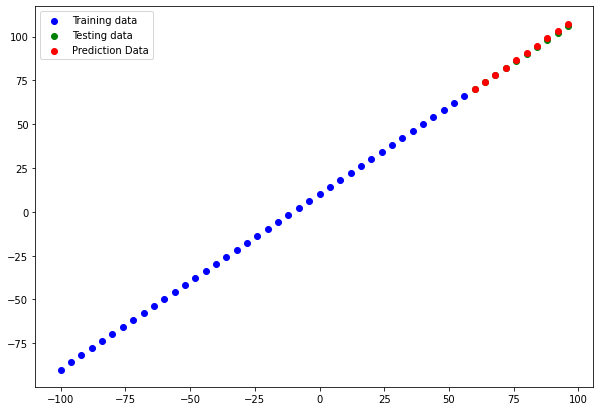

In [ ]:
plot_func(train_data = X_train,
              train_label = y_train,
              test_data = X_test,
              test_label = y_test,
              pred_data = y_pred)

### Evaluating models predictions with regression evaluation metrics

Evaluation metrics depend on the problems we are working on.

For regression two of the main metrics are:

* MAE: mean absolute error -> mean(abs(y - y_pred))
---
* MSE: mean square error -> mean(
(y-y_pred)^2)

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)


1/1 [==============================] - 0s 27ms/step - loss: 0.5932 - mse: 0.5932


[0.5932384729385376, 0.5932384729385376]

In [ ]:
tf.squeeze(tf.constant(y_pred))
tf.expand_dims(y_test, axis = -1)

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[ 70],
       [ 74],
       [ 78],
       [ 82],
       [ 86],
       [ 90],
       [ 94],
       [ 98],
       [102],
       [106]], dtype=int32)>

In [ ]:
# Calulate the mean absolute error
loss = tf.metrics.mean_squared_error(y_test, tf.squeeze(tf.constant(y_pred)))
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.5932371>

In [ ]:
# Make a function for the mean squared error and mean absolute error
def mae(y_true = y_test, y_pred = y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(tf.constant(y_pred)))

def mse(y_true = y_test, y_pred = y_pred):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(tf.constant(y_pred)))


In [ ]:
mae(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.61526567>

In [ ]:
mse(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.5932371>

### Running experiments to improve our model

1. Get more data
2. Make the model larger
3. Train for longer

We do three modelling experiments: 
1. `model-1` - original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, tained for 500 epochs.

In [ ]:
tf.random.set_seed(42)
# Creating model_1

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape= [1])
])

# Compiling model_1
model_1.compile(loss="MAE",
             optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
             metrics = ["mae"])

# Creating model_2

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu", input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compiling model_2
model_2.compile(loss="MAE",
               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
               metrics=["mae"])

# Creating model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compiling model_3
model_3.compile(loss="MAE",
               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
               metrics="mae")


In [ ]:
model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs=100, verbose = 0)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 57.6167 - mae: 57.6167
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 56.7396 - mae: 56.7396
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 55.8926 - mae: 55.8926
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 55.0317 - mae: 55.0317
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 54.1866 - mae: 54.1866
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 53.3338 - mae: 53.3338
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 52.4737 - mae: 52.4737
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 51.5879 - mae: 51.5879
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 50.7648 - mae: 50.7648
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 49.9412 - mae: 49.9412
Epoch 11/100
2/2 [==============================] - 0s 7ms

1/1 [==============================] - 0s 54ms/step


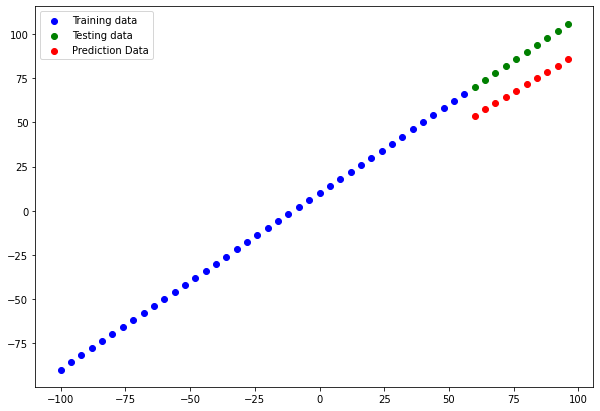

In [ ]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_func(pred_data = y_pred_1)

In [ ]:
# Evaluate model predictions
print(mae(y_pred = y_pred_1))
print(mse(y_pred = y_pred_1))

tf.Tensor(18.24002, shape=(), dtype=float32)
tf.Tensor(334.42877, shape=(), dtype=float32)


1/1 [==============================] - 0s 62ms/step
[[ 69.57192 ]
 [ 73.70972 ]
 [ 77.84751 ]
 [ 81.985306]
 [ 86.123085]
 [ 90.26088 ]
 [ 94.39868 ]
 [ 98.53647 ]
 [102.674255]
 [106.81205 ]]


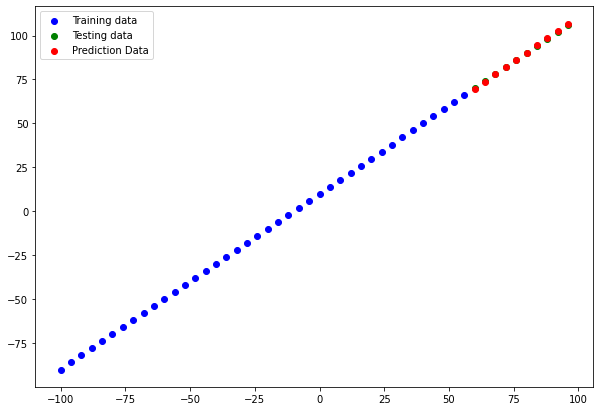

In [ ]:
# Make plot and predictions for model_2
model_2.fit(tf.expand_dims(X_test, axis = -1), y_test, epochs = 500, verbose = 0)
y_pred_2 = model_2.predict(X_test)
print(y_pred_2)
plot_func(pred_data = y_pred_2)


In [ ]:
# Evaluate model predictions
print(mae(y_pred=y_pred_2))
print(mse(y_pred=y_pred_2))

tf.Tensor(0.36909637, shape=(), dtype=float32)
tf.Tensor(0.19349824, shape=(), dtype=float32)


1/1 [==============================] - 0s 53ms/step


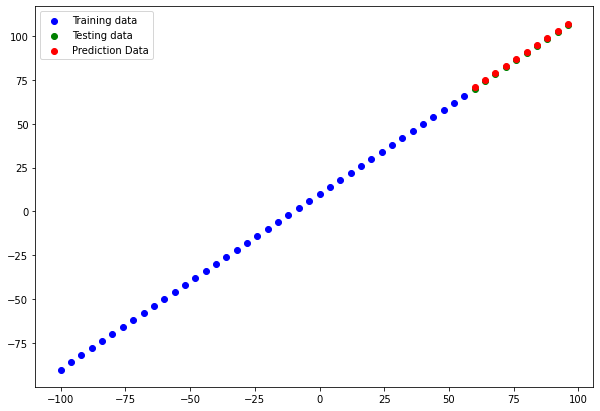

In [ ]:
# Make plot and predictions for model_3
model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500, verbose=0)
y_pred_3 = model_3.predict(X_test)
plot_func(pred_data=y_pred_3)

In [ ]:
# Evaluate model predication
print(mae(y_pred = y_pred_3))
print(mse(y_pred=y_pred_3))

tf.Tensor(0.80774766, shape=(), dtype=float32)
tf.Tensor(0.6650837, shape=(), dtype=float32)


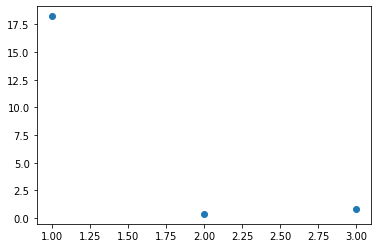

In [ ]:
plt.scatter([1,2,3], [mae(y_pred = y_pred_1), mae(y_pred = y_pred_2), mae(y_pred = y_pred_3)])

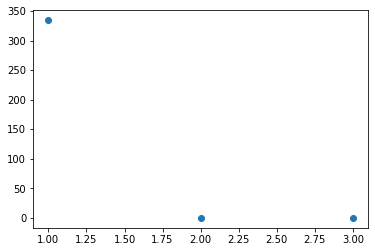

In [ ]:
plt.scatter([1,2,3], [mse(y_pred = y_pred_1), mse(y_pred = y_pred_2), mse(y_pred = y_pred_3)])

### Coparing the results

In [ ]:
# Creating a pandas dataframe to store the MAE and MSE values
import pandas as pd
model_results = [["model_1", mae(y_pred = y_pred_1).numpy(), mse(y_pred = y_pred_1).numpy()],
                 ["model_2", mae(y_pred = y_pred_2).numpy(), mse(y_pred = y_pred_2).numpy()],
                 ["model_1", mae(y_pred = y_pred_3).numpy(), mse(y_pred = y_pred_3).numpy()]]
model_evaluation = pd.DataFrame(model_results, columns=["model", "mae", "mse"])

In [ ]:
model_evaluation

,model,mae,mse
0,model_1,18.240021,334.428772
1,model_2,0.369096,0.193498
2,model_1,0.807748,0.665084


In [ ]:
summary_model(model_2)

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 100)               200       
                                                                 
 dense_155 (Dense)           (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


### Tracking your experiments
* TensorBoard - helps track modelling expt
* Weight and Biases - Expt tracnking, hyperparameter optimization and dataset versioning

## Saving the models

This allows the use of a model outside google colab and used in other applications. 

The two main model formats for saving are:
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save("model_2_SavedModel_format")

In [ ]:
# Save model in the HDF5 format
model_2.save("model_2.h5")

## Loading in a saved model

In [ ]:
# Load in the SavedModel format
model_2_sf = tf.keras.models.load_model("/content/model_2_SavedModel_format")

In [ ]:
# Compare loaded and model_2 prediction
pred_model_2 = model_2.predict(X_test)
pred_model_2_sf = model_2_sf.predict(X_test)

1/1 [==============================] - 0s 224ms/step


In [ ]:
pred_model_2 == pred_model_2_sf

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load the HDF5 format
model_2_h5 = tf.keras.models.load_model("/content/model_2.h5")

In [ ]:
model_2_h5.predict(X_test) == pred_model_2

1/1 [==============================] - 0s 31ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download the model

1. Download from files tab
2. Use code

In [ ]:
# Download a file from Colab
from google.colab import files
files.download("/content/model_2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Practical example

In [ ]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Read csv data
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# My function to convert catagories into numbers
def convert_to_number(data = data, column_name = ''):
  choice = list(set(data[column_name]))
  choice = {choice[i]:i for i in range(len(choice))}
  data[column_name+"_num"] = [choice[i] for i in data[column_name]]
  return data
new_data = data
for i in data:
  if data[i].dtype == 'object':
    new_data = convert_to_number(column_name = i)

new_data.head()

# My way of splitting data into train and test sets
from tensorflow.python.ops.math_ops import floor
X_train, y_train = X_tf[:int(floor(0.8*len(X_tf)).numpy())], y[:int(floor(0.8*len(y)).numpy())]
X_test, y_test = X_tf[int(floor(0.8*len(X_tf)).numpy()):], y[int(floor(0.8*len(y)).numpy()):]

In [ ]:
# Get the data 
data = pd.get_dummies(data)
data.head()
X = data.drop("charges", axis = 1)
y = data["charges"]


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.484607,0.909880,0,1,0,0,1,0,0,0,1
1,0.459101,1.101313,1,0,1,1,0,0,0,1,0
2,0.714158,1.076202,3,0,1,1,0,0,0,1,0
3,0.841686,0.740459,0,0,1,1,0,0,1,0,0
4,0.816180,0.941840,0,0,1,1,0,0,1,0,0


## Preprocessing data

In [ ]:
# Normalizing data using mean normalization
X["age"] = X["age"] / np.mean(X["age"])
X["bmi"] = X["bmi"] / np.mean(X["bmi"])
y_norm = np.mean(y)
y = y / y_norm
X.head()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Make a colum transformer
ct = make_column_transformer((MinMaxScaler(), ["age", "bmi", "children"]), # Turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ['sex', "smoker", "region"])
)

# Create X and y
X = insurance_data.drop("charges", axis = 1)
y = insurance_data["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal.shape

(1070, 11)

In [ ]:
# Build a neural network to fit out normalized data

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(10, activation= "relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss="MAE",
                        optimizer = "Adam",
                        metrics = ["mae"])


callback = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience = 10)
history = insurance_model.fit(X_train_normal, y_train, epochs = 300, callbacks = [callback])

Epoch 1/300
34/34 [==============================] - 1s 2ms/step - loss: 13346.0107 - mae: 13346.0107
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 13345.2861 - mae: 13345.2861
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 13343.0293 - mae: 13343.0293
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 13336.7881 - mae: 13336.7881
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 13323.4814 - mae: 13323.4814
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 13300.2715 - mae: 13300.2715
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 13263.9707 - mae: 13263.9707
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 13211.0342 - mae: 13211.0342
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 13138.6309 - mae: 13138.6309
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 13044.35

Text(0, 0.5, 'loss')

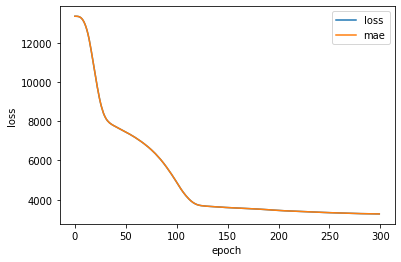

In [ ]:
# Plot the history
pd.DataFrame(history.history).plot()
plt.xlabel("epoch")
plt.ylabel("loss")

In [ ]:
# Evalualate the model


In [ ]:
# Split data into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Creating tensors
X_tf = tf.constant(X)
y = tf.constant(y)

In [ ]:
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape = [11], activation = "relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Complite the model
model.compile(loss="MAE",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])


In [ ]:
history = model.fit(X_train, y_train, epochs = 100, verbose = 0)

Text(0, 0.5, 'loss')

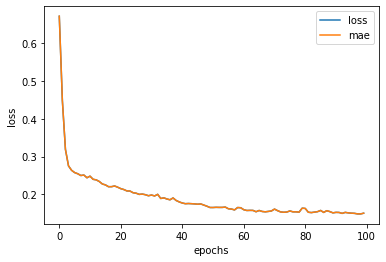

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [ ]:
# Checking the predictions
y_pred = model.predict(X_test)

14/14 [==============================] - 0s 2ms/step


14/14 [==============================] - 0s 2ms/step - loss: 0.1414 - mae: 0.1414


[0.1413615345954895, 0.1413615345954895]

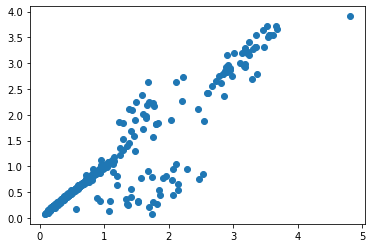

In [ ]:
# Checking the predictions
y_pred = model.predict(X_test)
# Visualizing the model results
plt.scatter(y_test, y_pred)

model.evaluate(X_test, y_test)

## Optimizing the model

1. Increasing the numbers of layers 3
2. Increasing the epochs 500
3. Change the loss function to MSE

In [ ]:
# Creating a model with increased depth
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[11], activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
])

# Compliling the model
model_1.compile(loss="MSE",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mse"]
                )



In [ ]:
# Fitting model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
history = model_1.fit(X_train, y_train, epochs = 200, verbose=0, callbacks = [callback])


Text(0, 0.5, 'loss')

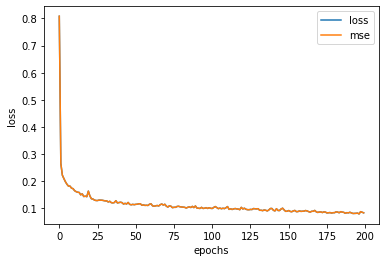

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

14/14 [==============================] - 0s 2ms/step - loss: 0.1983 - mse: 0.1983


[0.1983434110879898, 0.1983434110879898]

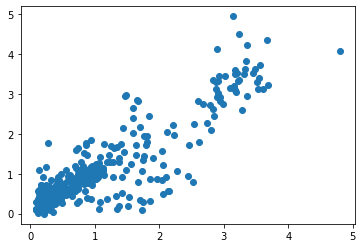

In [ ]:
# Checking the predictions
y_pred = model_1.predict(X_test)
# Visualizing the model results
plt.scatter(y_test, y_pred)

model_1.evaluate(X_test, y_test)